<a href="https://colab.research.google.com/github/prudhvi193/Movie-Recommendation-System-using-Collaborative-Filtering-and-Latent-Factor-Model/blob/main/LF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Project-4 / Group-12***

#### ***Name : Prudhviraj Sheela | OSU CWID : A20228857***

#### ***Name : Aman Masipeddi | OSU CWID : A20198116***

***Latent Factor Model (LF)***

In [ ]:
# Required dependencies and packages for the Latent Factor Model Program
import numpy as np
import pandas as pd
import math
from numpy.linalg import norm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import csv

***Loading of input data files and creation of dataframes*** 


In [ ]:
input_train = "/content/training_dataset.csv" # Loading the input training file
read_data = pd.read_csv(input_train) # Creating a data frame for the input training data loaded
no_users = read_data['user_id'].max() # Stroing the count of users
no_items = read_data['item_id'].max() # Storing the count of items

***Initializing the P and Q matrices***

In [ ]:
k = 25 # Given value of K
lamda = 0.1 # Given value of λ
mu = 0.01 # Given value of μ
algo_iterations = 40 # Given number of algorithm iterations
maximum = np.sqrt(5/k) # Maximum size of P and Q's range as given
P = np.random.uniform(0,maximum,(no_users,k)) # Initialized P matrix within the given range of [0,sqrt(5/k)]
Q = np.random.uniform(0,maximum,(no_items,k)) # Initialized Q matrix within the given range of [0,sqrt(5/k)]
Error_func = np.zeros((algo_iterations,2)) # This stores the associated error function for each iteration

***Computing Error functions using Stochastic Gradient Descent (SGD) method***

In [ ]:
# Below is the process of computing Stochastic Gradient Descent (SGD)
for iter in range(algo_iterations): # Loading the iterations
  with open(input_train) as fi: # Accessing the contents of file from disk
    c1 = 0
    c2 = 0
    Px = 0 # Normalization Variable corresponding to users
    Qi = 0 # Normalization Variable corresponding to items
    Err = 0 # This stores the final Error function value for the corresponding iteration
    
    # In the below "for" loop we obtain the final P and Q matrices associated to that particular iteration
    for line in fi: # Iterating through each entry of the file
      l = line.split(',') # Obtaining each parameters of that particular row by splitting them
      if c1 > 0: # Initially it skips the header and then the computation starts from the first row
        user = int(l[0])-1 # Loading each row's user id
        item = int(l[1])-1 # Loading each row's item id
        rating = int(l[2]) # Loading each row's rating
        err = rating - np.dot(P[user, :],Q[item, :].T) # Computing the initial error value associated for each row entry for the corresponding iteration 
        P[user,:] += mu * (((-err) * Q[item,:]) - (lamda * P[user,:])) # Updating the P matrix according to the formula in SGD
        Q[item,:] += mu * (((-err)* P[user,:] - lamda * Q[item,:])) # Updating the Q matrix according to the formula in SGD
      c1 += 1 # Incrementing the count and iterating through next row in the file
    
    # In the below "for" loop once the P and Q matrices are obtained and are fixed, we calculate the Error function now based on these values
    for line in fi: # Iterating through each entry of the file
      l = line.split(',') # Obtaining each parameters of that particular row by splitting them
      if c2 > 0: # Initially it skips the header and then the computation starts from the first row
        user = int(l[0]) - 1 # Loading each row's user id
        item = int(l[1])-1 # Loading each row's item id
        rating = int(l[2]) # Loading each row's rating
        Err += pow((rating - np.dot(P[user,:],Q[item,:].T)),2) # We update the initial term of the error function obtained now based on the P and Q values which are fixed for each user and item
      c2 += 1 # Incrementing the count and iterating through next row in the file
    
    # In the below for loop we find the value of [(||Px||)^2] value which is the square of L2 norm for Users
    for a in range(len(P)):
      Px += pow(norm(P[a,:]),2)

    # In the below for loop we find the value of [(||Qi||)^2] value which is the square of L2 norm for Items
    for b in range(len(Q)):
      Qi += pow(norm(Q[b,:]),2)
    
    # Below  is the error function formula for calculating the Latent Factor Model
    Err += Err + lamda*(Px+Qi) # The final error function is obtained at the end of each iteration by substituting all the above computed values
    Err = round(Err,2) # Rounding the value of error to "2" decimal places
    Error_func[iter,:] = np.array([iter+1, Err]) # Updating the Error function array with its iteration number and error value
  print("Error function for iteration number",iter+1,"and its value is",Err) # Prints the results of error function associated with respect to each iteration


Error function for iteration number 1 and its value is 781.72
Error function for iteration number 2 and its value is 819.7
Error function for iteration number 3 and its value is 836.6
Error function for iteration number 4 and its value is 845.92
Error function for iteration number 5 and its value is 852.02
Error function for iteration number 6 and its value is 856.63
Error function for iteration number 7 and its value is 860.59
Error function for iteration number 8 and its value is 864.34
Error function for iteration number 9 and its value is 868.17
Error function for iteration number 10 and its value is 872.23
Error function for iteration number 11 and its value is 876.62
Error function for iteration number 12 and its value is 881.31
Error function for iteration number 13 and its value is 886.25
Error function for iteration number 14 and its value is 891.35
Error function for iteration number 15 and its value is 896.58
Error function for iteration number 16 and its value is 901.91
Err

***Graph plotted between Error function (E) and No.of Algorithm Iterations***

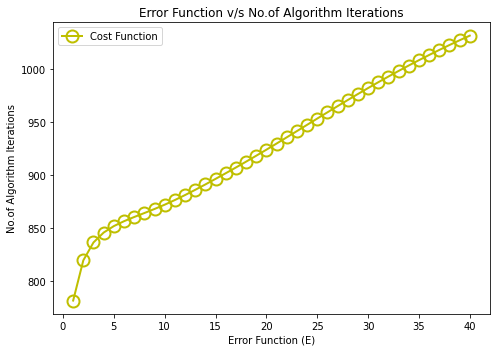

In [ ]:
# Below we have plotted the line plot between Error Function (E) v/s Number of Algorithm Iterations
import matplotlib as mplib
import matplotlib.pyplot as plt
figure, axes = plt.subplots(1,1,figsize=(7,5)) # Specifying the dimensions of graph

# In the below step we assign a line plot for the iteration and its associated error function

axes.plot(Error_func[:,1], Error_func[:,0], 'yo-', linewidth = 2, markersize = 12, markeredgewidth = 2, label = 'Cost Function', fillstyle = 'none')
axes.set_xlabel("Error Function (E)") # Setting the x-label to Error Function
axes.set_ylabel("No.of Algorithm Iterations") # Setting the y-label to number of algorithm iterations
axes.set_title("Error Function v/s No.of Algorithm Iterations") # Setting the title
axes.legend(loc=0) 
figure.tight_layout() # Adjusts the graph to a tight layout
plt.show() # Displays the plot

***Rating Predictions and Model Evaluation with Test Data***

In [ ]:
input_test = '/content/test_dataset.csv' # Loading the test data for model evaluation
orig_rating = [] # List for stroing original ratings from the test dataset
predicted_rating = [] # List for stroing the predicted rating obtained from training dataset
with open(input_test) as fi: # Accessing the test dataset content
  c = 0
  for line in fi: # Iterating through each row of the test dataset and find their associate original and predicted ratings
    l = line.split(',') # Splits each rows details into a list
    if c > 0: # Initially it skips the header and then the computation starts from the first row
      user = int(l[0])-1 # Loading the user details
      item = int(l[1])-1 # Loading the item details 
      orig_rating.append(int(l[2])) # Appends the original rating present in the test dataset
      predicted_rating.append(np.dot(P[user, :],Q[item, :].T)) # Appends the predicted rating obtained from the dot product of P & Q.T(Q's transpose)
    c += 1 # Incrementing through each row of the test file

***Computation of RMSE***

In [ ]:
# Below we get the RMSE value associated for the actual(original) and predicted ratings
def RMSE(y_actual, y_predicted):
  rms = sqrt(mean_squared_error(y_actual, y_predicted)) # Final RMSE value is computed for both the rating lists
  return round(rms,4)
rmse_lf = RMSE(orig_rating, predicted_rating) # Pass both the ratings to RMSE function
print("RMSE obtained for latent factor model is ", rmse_lf) # Root mean squared error for "lf" is resulted

RMSE obtained for latent factor model is  0.8953


***Comparing and Contrasting the results between CF.py and LF.py:***

***I) RMSE Scores obtained for CF.py:***

a) RMSE for Cosine Similarity = 1.1743

b) RMSE for Adjusted Cosine Similarity = 0.8821

***II) RMSE Score obtained for LF.py:***

a) RMSE for Latent Factor Model = 0.8947

--> On observing the above results we can check out that almost all both have the simialar RMSE scores.

--> But in regards, recommending based on factors is more robust system than just finding item-item similarites.

--> So, let us consider if a user has not seen a movie 'A' but the user might have seen the movies that are related to the movie 'A' which can help us in estimating the latent factors and these estimates can be used further.

--> So, in general the factors are called as latent since they are present in our existing data but are not exactly evaluated until you compute the reduced rank matrix factorization (i.e, P and Q) which thereby allows the factors to emerge and hence the latency.

--> Hence, we conclude that Latent Factor Model has better performance in predicting the ratings and also for obtaining a lesser RMSE scores compared to Collaborative Filtering.

***Team Members Contribution:***

***Prudhviraj Sheela***

--> Worked on developing the latent factor model and have computed the error function values using the Stochastic Gradient Descent (SGD) approach. 

--> Also, plotted the necessary graphs associated between error functions and the number of algorithms iterations.

--> Obtained the RMSE Scores for the Latent Factor Model from the actual ratings and predicted ratings obtained from the test data and training data.

--> Worked on the Bonus Task for building the model for (Laten Factor + Biases) and have observed the results of the model and written a comparative report between (LF and Lf+Biases).

***Aman Masipeedi***

--> Worked on developing the Item-Item Collaborative Filtering Model and computed the necessary utility matrices associated for both cosine and adjusted cosine similarities.

--> Also, using the equations mentioned in the project details I had written a computation accordingly using them for finding the Rating Scores for both the Cosine and Adjusted Cosine Similarity Measures.

--> Obtained the RMSE Scores for both the Cosine and Adjusted Cosine Similarity from the actual ratings and predicted ratings obtained from the test data and training data.

--> We have also worked together on the Bonus Task for building the model for (Laten Factor + Biases) and have observed the results of the model and have written a comparative report for (LF and Lf+Biases).

--> As a whole we both discussed different points on how to compare and contrast about the results obtained for both the programs and we had written the responses for it accordingly.
